# Handwritten digits classification using neural network

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

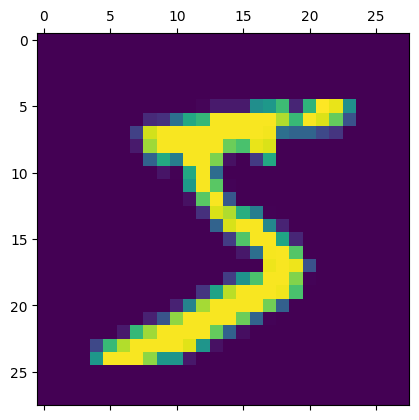

In [7]:
plt.matshow(X_train[0])

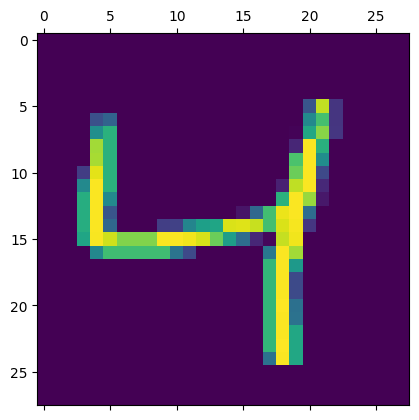

In [8]:
plt.matshow(X_train[2])

In [9]:
Y_train[2]

4

In [10]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

**Doing scaling to get our values in a similar range to make the accuracy of our model high. The model will be able to understand the input features more accurately.**

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Now we need to flatten our input dataset because we provide a 1D array to out input neurons. We will convert 2D image of 28*28 grid into 1D array of 784 elements.

In [13]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [14]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

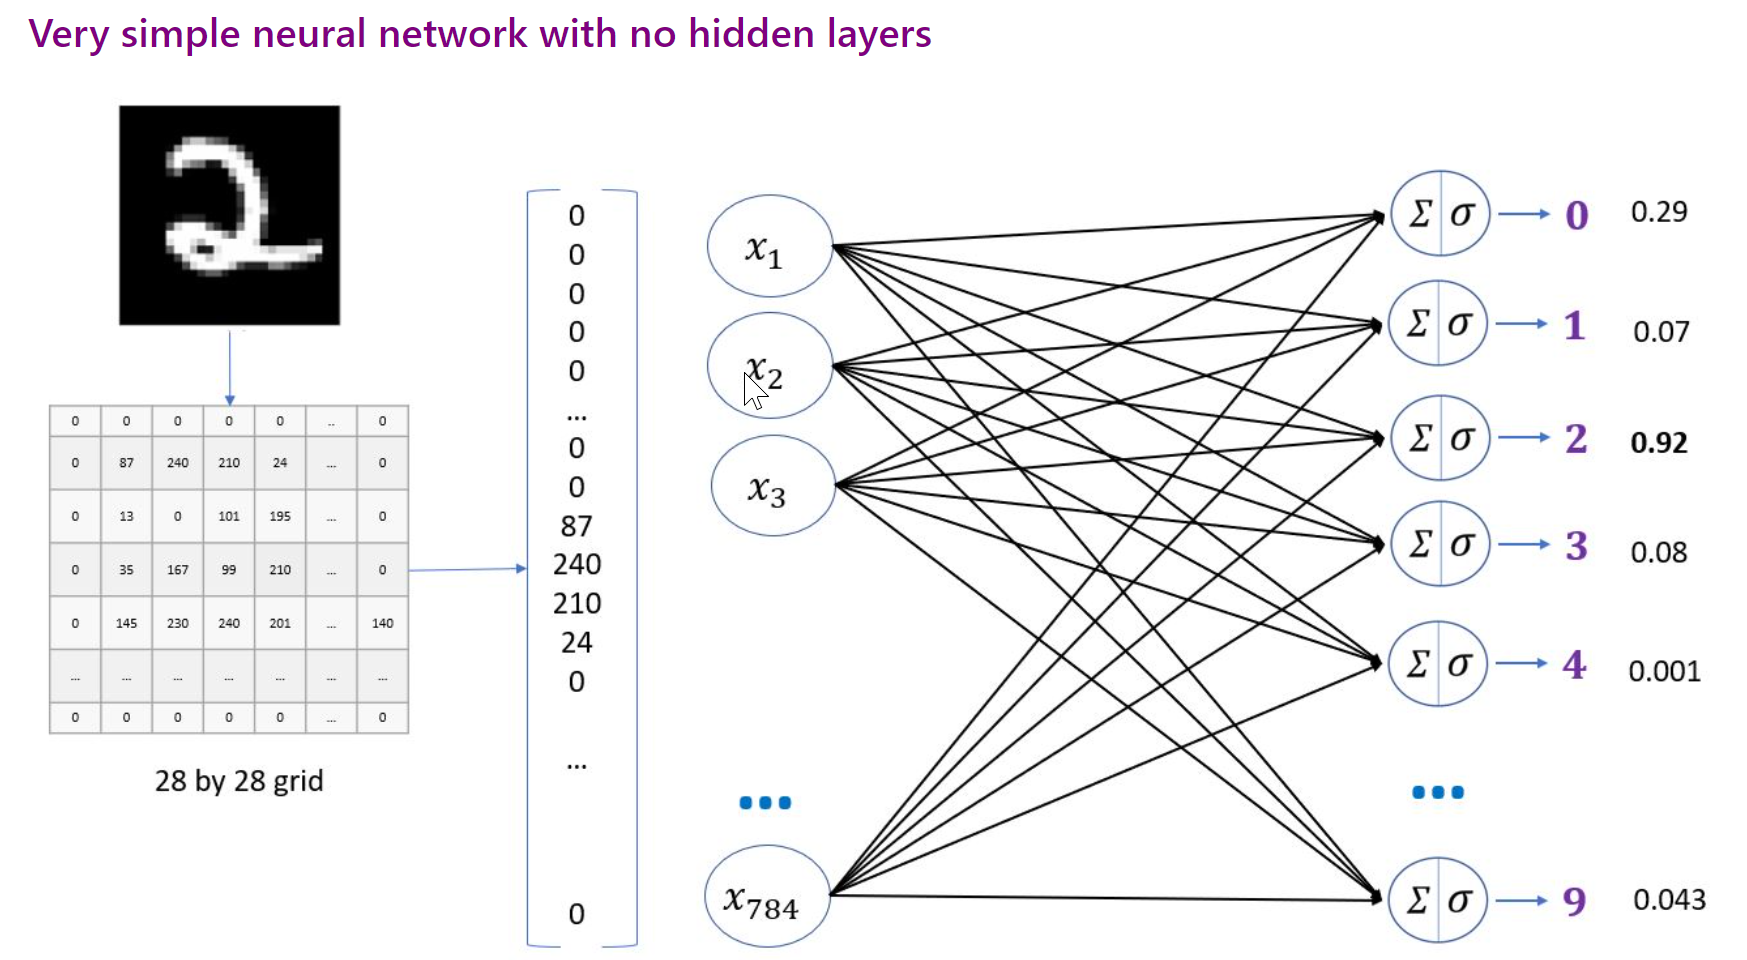

In [15]:
model = keras.Sequential([keras.layers.Dense(10,input_shape = (784,),activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flattened,Y_train,epochs=5)

C:\Users\ebrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8203 - loss: 0.7035
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9142 - loss: 0.3092
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9193 - loss: 0.2886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9244 - loss: 0.2752
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9244 - loss: 0.2642


**keras.Sequential():** This defines a linear stack of layers where each layer feeds into the next. In this case, the model contains a single dense layer.

**keras.layers.Dense(10):** This creates a fully connected (dense) layer with 10 neurons. Each neuron will output a value.

**Dense Layer:** In a dense layer, each neuron is connected to every neuron in the previous layer.

**input_shape=(784,):** This specifies the shape of the input data. The model expects input data with 784 features (e.g., flattened 28x28 images in the case of MNIST digit data).
The input data should be a vector of length 784 (i.e., 28×28 pixels flattened into one long vector).

**activation='sigmoid':** The activation function used for each neuron is the sigmoid function. The sigmoid activation squashes the output of each neuron to be between 0 and 1.

**optimizer='adam':** The Adam optimizer is used to update the weights of the neurons during training. It is a very popular optimization algorithm that combines the advantages of both AdaGrad and RMSProp. Adam is effective for training deep neural networks.

**loss='sparse_categorical_crossentropy':** This is the loss function used to measure the model's performance.
Sparse categorical crossentropy is used for multi-class classification tasks, where the target labels are integers (like 0, 1, 2, ...).
It is ideal when each class is represented by a single integer label (e.g., in the MNIST dataset, where the digits are represented as 0-9).

**metrics=['accuracy']:** This tells Keras to evaluate the model’s performance using accuracy during training. Accuracy measures the proportion of correctly predicted classes.

**Key Concepts:**

**Dense Layer:** A fully connected neural network layer.

**Activation Function:** Sigmoid is used here, which is typically replaced with ReLU for more complex models, but sigmoid can work well for simple tasks.

**Adam Optimizer:** Combines momentum and adaptive learning rates to improve optimization.

**Loss Function:** Measures the difference between the predicted output and the actual labels.

**Epochs:** Number of times the model sees the entire training dataset during training.

In [16]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9152 - loss: 0.3053


[0.2717089056968689, 0.9241999983787537]

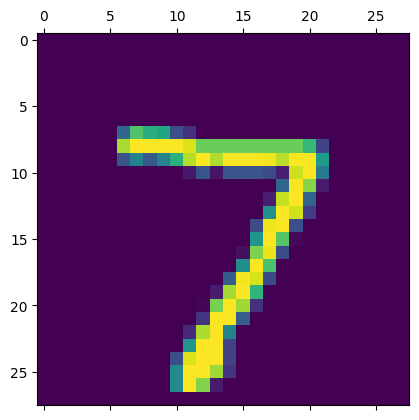

In [17]:
plt.matshow(X_test[0])

In [18]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([2.93163769e-02, 3.37781415e-07, 3.86236720e-02, 9.68239903e-01,
       2.97652395e-03, 1.50196910e-01, 2.12085456e-06, 9.99874890e-01,
       1.18527725e-01, 6.79509282e-01], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    6,    5,    3,    3,    1],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   7,    9,  900,   28,   10,    6,   12,   13,   45,    2],
       [   3,    0,   10,  922,    0,   28,    2,   13,   26,    6],
       [   1,    1,    3,    1,  916,    0,   11,    7,   10,   32],
       [   7,    2,    2,   27,    7,  789,   14,    9,   29,    6],
       [  13,    3,    3,    2,    7,   20,  906,    2,    2,    0],
       [   1,    5,   19,    9,    3,    0,    0,  966,    4,   21],
       [   5,    8,    5,   18,    9,   28,    8,   14,  874,    5],
       [  10,    5,    1,   10,   28,    8,    0,   34,   11,  902]])>

Text(58.222222222222214, 0.5, 'Truth')

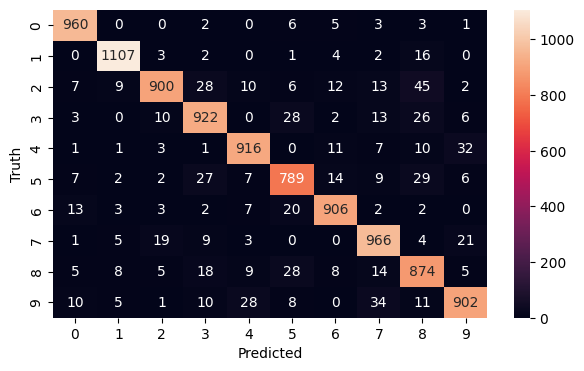

In [22]:
import seaborn as sn
plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.gca().set_xlabel('Predicted') 
plt.gca().set_ylabel('Truth')

__Using hidden layer__

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

C:\Users\ebrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8741 - loss: 0.4455
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9611 - loss: 0.1315
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9744 - loss: 0.0869
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9814 - loss: 0.0631
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0521


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(58.222222222222214, 0.5, 'Truth')

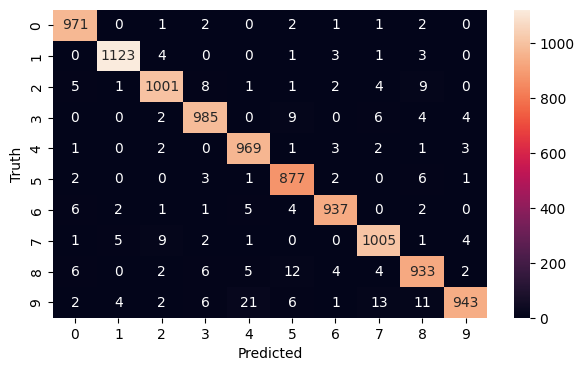

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.gca().set_xlabel('Predicted') 
plt.gca().set_ylabel('Truth')

__Using Flatten layer so that we don't have to call .reshape on input dataset__

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD", histogram_freq=1)

model.fit(X_train, Y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7337 - loss: 1.0150
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9022 - loss: 0.3545
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9151 - loss: 0.2996
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9267 - loss: 0.2630
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9352 - loss: 0.2345


In [38]:
%load_ext tensorboard
%tensorboard --logdir logs/
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6008 (pid 9296), started 0:00:12 ago. (Use '!kill 9296' to kill it.)

Either run above inline magic or go to git bash or your command prompt and type below to run it, tensorboard --logdir logs/ This will launch tensorboard at this url which you can open in your browser http://localhost:6006/

In [26]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9713 - loss: 0.1087


[0.09306863695383072, 0.9750000238418579]